<a href="https://colab.research.google.com/github/taka-sigure/AI_Datascience_Intern/blob/main/36_%E5%AE%9F%E8%A3%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# イントロダクションパート  

1.   Webサイト運営会社社長から、コンバージョン確度が高い顧客に対して、プロモーションを行いたいと依頼があった。
2. 本分析では、exercise.csv を使用して、conversion確度の高いユーザーを見つけ出し、そのユーザに対してどのようなプロモーションを打てばいいかを分析する。

データ分析の結論として以下の実施を提案する。
* used_discountとused_bogoの片方のみしか使ったことのないユーザーに対して、持っていないクーポンを付与する。
* 顧客を絞るのであれば、recencyが最近で、zip_codeがRuralである顧客から配っていくべきである。






# メインパート



In [ ]:
!pip install -q japanize_matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import japanize_matplotlib
from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 8

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# データの読み込み
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/exercise.csv')

### データ全体を眺める

In [ ]:
# 定性的なデータの確認（代表値の確認）
df.describe(include='all')

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000,64000,64000.000000,64000,64000,64000.000000
unique,NaN,NaN,NaN,NaN,3,NaN,3,3,NaN
top,NaN,NaN,NaN,NaN,Surburban,NaN,Web,Buy One Get One,NaN
freq,NaN,NaN,NaN,NaN,28776,NaN,28217,21387,NaN
mean,5.763734,242.085656,0.551031,0.549719,NaN,0.502250,NaN,NaN,0.146781
std,3.507592,256.158608,0.497393,0.497526,NaN,0.499999,NaN,NaN,0.353890
min,1.000000,29.990000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,2.000000,64.660000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
50%,6.000000,158.110000,1.000000,1.000000,NaN,1.000000,NaN,NaN,0.000000
75%,9.000000,325.657500,1.000000,1.000000,NaN,1.000000,NaN,NaN,0.000000


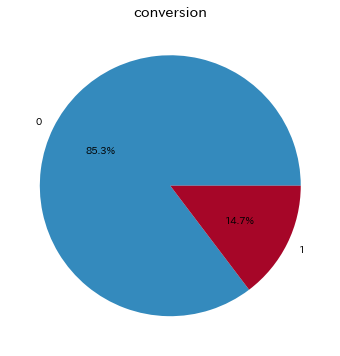

In [ ]:
# 全体のconversionの割合
plt.figure(figsize=(6,6))
plt.title('conversion')
_index = df['conversion'].value_counts(normalize=True)
plt.pie(_index, labels= _index.index, autopct = '%.1f%%')
plt.show()

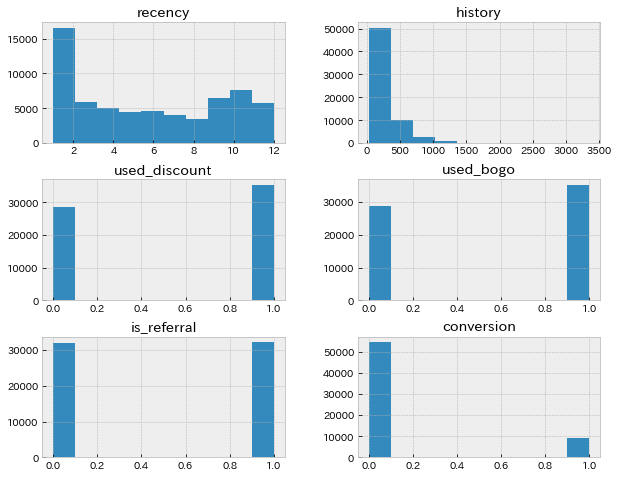

In [ ]:
# ヒストグラムで全体分布の確認
df.hist();
plt.show()

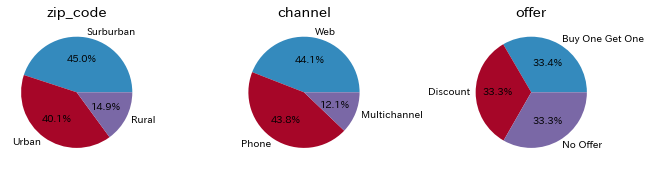

In [ ]:
# 非数値データの内訳
plt.figure(figsize=(9,3))
list_index = ['zip_code', 'channel', 'offer']

for i in range(len(list_index)):
    in_index = list_index[i]
    plt.subplot(1, len(list_index), i+1)
    plt.title(in_index)
    _index = df[in_index].value_counts(normalize=True)
    plt.pie(_index, labels=_index.index, autopct = '%.1f%%')
    plt.tight_layout()

plt.show()

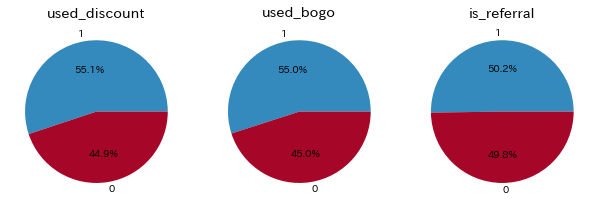

In [ ]:
# 0,1で表現されている変数の割合
plt.figure(figsize=(9,3))
list_index = ['used_discount','used_bogo','is_referral']

for i in range(len(list_index)):
    in_index = list_index[i]
    plt.subplot(1, len(list_index), i+1)
    plt.title(in_index)
    _index = df[in_index].value_counts(normalize=True)
    plt.pie(_index, labels=_index.index, autopct = '%.1f%%')
    plt.tight_layout()

plt.show()

### conversionで分けてデータを見る

In [ ]:
# conversion毎にgroupby()でまとめる
groups_con = df.groupby('conversion')
groups_con.size()

conversion
0    54606
1     9394
dtype: int64

In [ ]:
# conversion毎の代表値
groups_con.agg(['mean','median'])

recency            history          used_discount         \
                mean median        mean   median          mean median   
conversion                                                              
0           5.872505    6.0  235.163403  151.835      0.549647    1.0   
1           5.131467    4.0  282.323739  202.460      0.559080    1.0   

           used_bogo        is_referral         
                mean median        mean median  
conversion                                      
0           0.538988    1.0    0.517580    1.0  
1           0.612093    1.0    0.413136    0.0

##### conversion0

In [ ]:
con0 = groups_con.get_group(0).reset_index(drop=True)
con0.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0


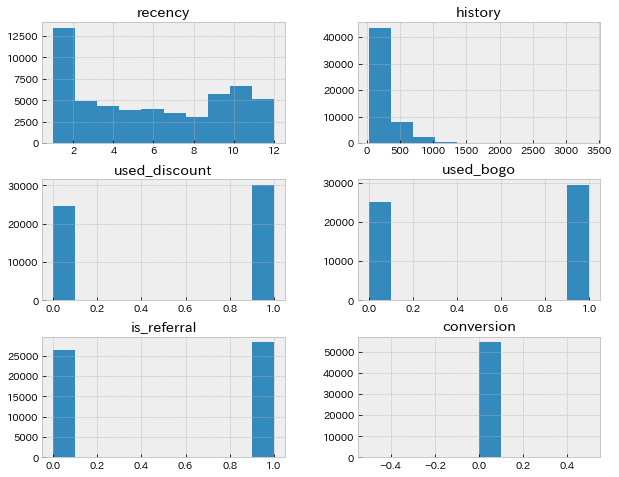

In [ ]:
# cnonversion0での分布
con0.hist();
plt.show()

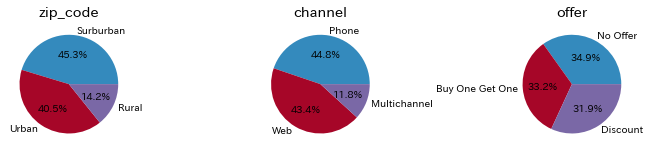

In [ ]:
# 非数値データの割合
plt.figure(figsize=(9,3))
list_index = ['zip_code', 'channel', 'offer']

for i in range(len(list_index)):
    in_index = list_index[i]
    plt.subplot(1, len(list_index), i+1)
    plt.title(in_index)
    _index = con0[in_index].value_counts(normalize=True)
    plt.pie(_index, labels=_index.index, autopct = '%.1f%%')
    plt.tight_layout()

plt.show()

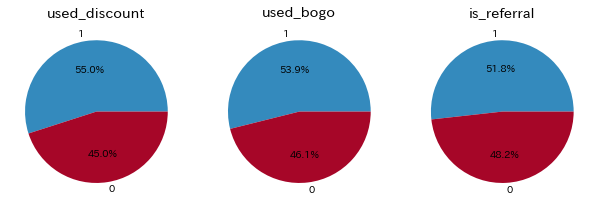

In [ ]:
# 0,1で表現されている変数の割合
plt.figure(figsize=(9,3))
list_index = ['used_discount','used_bogo','is_referral']

for i in range(len(list_index)):
    in_index = list_index[i]
    plt.subplot(1, len(list_index), i+1)
    plt.title(in_index)
    _index = con0[in_index].value_counts(normalize=True)
    plt.pie(_index, labels=_index.index, autopct = '%.1f%%')
    plt.tight_layout()

plt.show()

##### conversion1

In [ ]:
con1 = groups_con.get_group(1).reset_index(drop=True)
con1.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,6,134.83,0,1,Surburban,0,Phone,Buy One Get One,1
1,7,548.91,0,1,Urban,1,Phone,Buy One Get One,1
2,2,101.64,0,1,Urban,0,Web,Discount,1
3,3,58.13,1,0,Urban,1,Web,No Offer,1
4,2,118.40,1,0,Surburban,0,Web,Discount,1


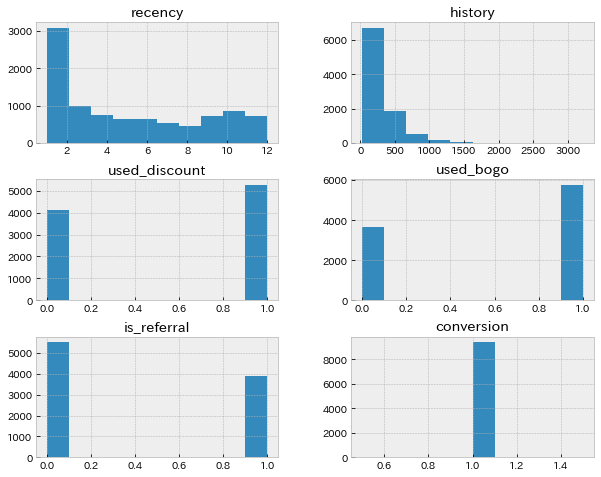

In [ ]:
# cnonversion1での分布
con1.hist();
plt.show()

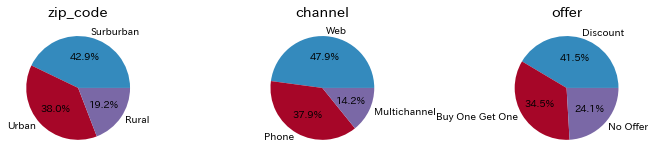

In [ ]:
# 非数値データの割合
plt.figure(figsize=(9,3))
list_index = ['zip_code', 'channel', 'offer']

for i in range(len(list_index)):
    in_index = list_index[i]
    plt.subplot(1, len(list_index), i+1)
    plt.title(in_index)
    _index = con1[in_index].value_counts(normalize=True)
    plt.pie(_index, labels=_index.index, autopct = '%.1f%%')
    plt.tight_layout()

plt.show()

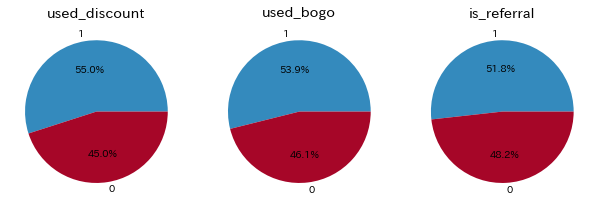

In [ ]:
# 0,1で表現されている変数の割合
plt.figure(figsize=(9,3))
list_index = ['used_discount','used_bogo','is_referral']

for i in range(len(list_index)):
    in_index = list_index[i]
    plt.subplot(1, len(list_index), i+1)
    plt.title(in_index)
    _index = con0[in_index].value_counts(normalize=True)
    plt.pie(_index, labels=_index.index, autopct = '%.1f%%')
    plt.tight_layout()

plt.show()

<メモ>  
* conversion=1であるのは現状14.7％である

* conversion_1の方が、referral、historyの小さい人が比率的多い

* zip_code：
Urban、Surburbanに比べ、Ruralのconversion率は高いことが推測可能

* channel：
Web, Phoneに比べ、Multichannelの方がconversionに繋がることが推測可能


* offer：
No Offerの人やGet One Buy Oneのofferを受けた人に比べ、Discountのofferを受けた人がconversionに繋がりやすいことが推測可能

### 相関分析と重回帰分析を行う

In [ ]:
_df = pd.get_dummies(df, drop_first=True)

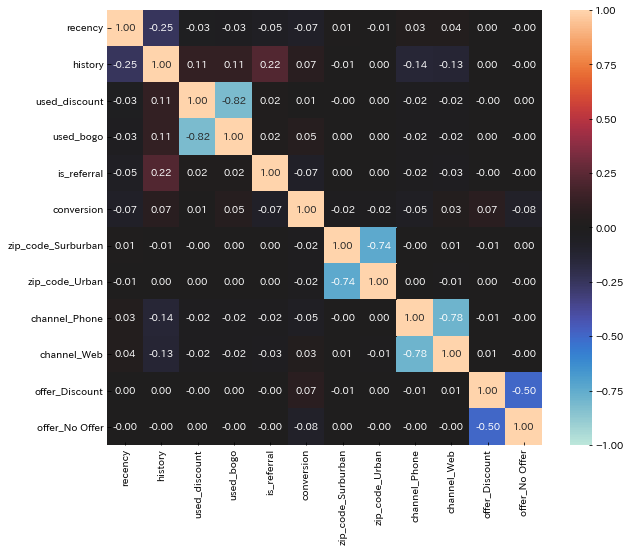

In [ ]:
# 相関分析
sns.heatmap(_df.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

In [ ]:
# `conversion`との相関が高い変数を確認する  
df.corr()['conversion'].sort_values(ascending=False)

conversion       1.000000
history          0.065153
used_bogo        0.051999
used_discount    0.006712
is_referral     -0.073924
recency         -0.074765
Name: conversion, dtype: float64

In [ ]:
# 無相関検定による統計的有意性の確認  
print(f'recency ✕ conversion:{stats.spearmanr(df["recency"], df["conversion"])}')
print(f'history ✕ conversion:{stats.spearmanr(df["history"], df["conversion"])}')
print(f'zip_code ✕ conversion:{stats.spearmanr(df["zip_code"], df["conversion"])}')
print(f'channel ✕ conversion:{stats.spearmanr(df["channel"], df["conversion"])}')
print(f'offer ✕ conversion:{stats.spearmanr(df["offer"], df["conversion"])}')
print(f'used_discount ✕ conversion:{stats.spearmanr(df["used_discount"], df["conversion"])}')
print(f'used_bogo ✕ conversion:{stats.spearmanr(df["used_bogo"], df["conversion"])}')

recency ✕ conversion:SpearmanrResult(correlation=-0.07562678662664347, pvalue=8.095619358932845e-82)
history ✕ conversion:SpearmanrResult(correlation=0.07012986768022048, pvalue=1.3639957185121394e-70)
zip_code ✕ conversion:SpearmanrResult(correlation=-0.03382597579970346, pvalue=1.1320835301251864e-17)
channel ✕ conversion:SpearmanrResult(correlation=0.017203656653008253, pvalue=1.3462077502844953e-05)
offer ✕ conversion:SpearmanrResult(correlation=-0.052079321026481634, pvalue=1.0872611324157762e-39)
used_discount ✕ conversion:SpearmanrResult(correlation=0.006711994731373258, pvalue=0.08950752793819947)
used_bogo ✕ conversion:SpearmanrResult(correlation=0.05199924146882672, pvalue=1.4227695072294682e-39)


<メモ>  
* それ単体で目的変数であるconversionと相関が高く、その統計的有意性を認められる説明変数はない
* used_discountとused_bogoは強い負の相関関係がある
* conversionとused_discountはほぼ相関がない

#### 重回帰分析  

In [ ]:
# 変数の選択: 目的変数→満足度、入力変数→年齢と満足度以外の数値データ
_df = pd.get_dummies(df, drop_first=True)
y = _df['conversion']
x = _df.drop(['conversion'], axis=1)

In [ ]:
# 変数の標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
feature = pd.DataFrame(x_scaled, columns=_df.drop(['conversion'], axis=1).columns)
feature

,recency,history,used_discount,used_bogo,is_referral,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web,offer_Discount,offer_No Offer
0,1.207751,-0.389003,0.902651,-1.104914,-1.00451,1.106380,-0.818119,1.133138,-0.888008,-0.706452,-0.706427
1,0.067359,0.339614,0.902651,0.905048,0.99551,-0.903849,-0.818119,-0.882505,1.126116,-0.706452,1.415574
2,0.352457,-0.239836,-1.107848,0.905048,0.99551,1.106380,-0.818119,-0.882505,1.126116,-0.706452,-0.706427
3,0.922653,1.693278,0.902651,-1.104914,0.99551,-0.903849,-0.818119,-0.882505,1.126116,1.415524,-0.706427
4,-1.073034,-0.768068,0.902651,-1.104914,-1.00451,-0.903849,1.222316,-0.882505,1.126116,-0.706452,-0.706427
...,...,...,...,...,...,...,...,...,...,...,...
63995,1.207751,-0.533055,0.902651,-1.104914,-1.00451,-0.903849,1.222316,-0.882505,1.126116,1.415524,-0.706427
63996,-0.217739,-0.793170,-1.107848,0.905048,0.99551,-0.903849,1.222316,1.133138,-0.888008,1.415524,-0.706427
63997,0.067359,-0.827992,0.902651,-1.104914,0.99551,-0.903849,1.222316,1.133138,-0.888008,1.415524,-0.706427
63998,-1.358132,1.213532,0.902651,-1.104914,0.99551,1.106380,-0.818119,-0.882505,-0.888008,-0.706452,-0.706427


In [ ]:
# 重回帰分析を実行  
np.random.seed(0)
multi_logit = sm.Logit(y, sm.add_constant(feature))
result = multi_logit.fit()

Optimization terminated successfully.
         Current function value: 0.399933
         Iterations 6


In [ ]:
# 分析結果の表示   
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             conversion   No. Observations:                64000
Model:                          Logit   Df Residuals:                    63988
Method:                           MLE   Df Model:                           11
Date:                Tue, 24 May 2022   Pseudo R-squ.:                 0.04112
Time:                        14:15:20   Log-Likelihood:                -25596.
converged:                       True   LL-Null:                       -26693.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.8572      0.012   -153.317      0.000      -1.881      -1.833
recency               -0.1870      0.012    -15.638      0.000      -0.210      -0.164
history                0.1213      0.013      9.510      0.000       0.096       0.146
used_discount          0.2839      0.018     15.575      0.000       0.248       0.320
used_bogo              0.3610      0.018     19.574      0.000       0.325       0.397
is_referral           -0.2785      0.012    -22.983      0.000      -0.302      -0.255
zip_code_Surburban    -0.1771      0.016    -11.197      0.000      -0.208      -0.146
zip_code_Urban        -0.1822      0.016    -11.479      0.000      -0.213      -0.151
channel_Phone         -0.0492      0.019     -2.594      0.009      -0.086      -0.012
channel_Web            0.0823      0.019      4.421      0.000       0.046       0.119
offer_Discount         0.1064      0.012      8.533      0.000       0.082       0.131
offer_No Offer        -0.1978      0.014    -14.144      0.000      -0.225      -0.170
======================================================================================
"""

In [ ]:
res_values = pd.DataFrame([result.tvalues[1:], result.pvalues[1:], result.params[1:]],
                          index=['z', 'p', 'coef']).T

#####drop_firstで落とされてしまった変数に関して、単回帰分析を行う

In [ ]:
offer_df = pd.get_dummies(df['offer'])
zip_code_df = pd.get_dummies(df['zip_code'])
channel_df = pd.get_dummies(df['channel'])

bogo_df = pd.DataFrame(offer_df['Buy One Get One'])
rural_df = pd.DataFrame(zip_code_df['Rural'])
multi_df = pd.DataFrame(channel_df['Multichannel'])

In [ ]:
np.random.seed(0) # 乱数の固定
multi_logit = sm.Logit(y, sm.add_constant(bogo_df))
result = multi_logit.fit()

Optimization terminated successfully.
         Current function value: 0.417042
         Iterations 6


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             conversion   No. Observations:                64000
Model:                          Logit   Df Residuals:                    63998
Method:                           MLE   Df Model:                            1
Date:                Tue, 24 May 2022   Pseudo R-squ.:               0.0001021
Time:                        14:15:21   Log-Likelihood:                -26691.
converged:                       True   LL-Null:                       -26693.
Covariance Type:            nonrobust   LLR p-value:                   0.01958
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.7787      0.014   -129.084      0.000      -1.806      -1.752
Buy One Get One     0.0550      0.024      2.339      0.019       0.009       0.101
===================================================================================
"""

In [ ]:
np.random.seed(0) # 乱数の固定
multi_logit = sm.Logit(y, sm.add_constant(rural_df))
result = multi_logit.fit()

Optimization terminated successfully.
         Current function value: 0.415953
         Iterations 6


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             conversion   No. Observations:                64000
Model:                          Logit   Df Residuals:                    63998
Method:                           MLE   Df Model:                            1
Date:                Tue, 24 May 2022   Pseudo R-squ.:                0.002714
Time:                        14:15:22   Log-Likelihood:                -26621.
converged:                       True   LL-Null:                       -26693.
Covariance Type:            nonrobust   LLR p-value:                 2.295e-33
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8193      0.012   -147.074      0.000      -1.844      -1.795
Rural          0.3570      0.029     12.336      0.000       0.300       0.414
==============================================================================
"""

In [ ]:
rural_res_values = pd.DataFrame([result.tvalues[1:], result.pvalues[1:], result.params[1:]],
                          index=['z', 'p', 'coef']).T

In [ ]:
np.random.seed(0) # 乱数の固定
multi_logit = sm.Logit(y, sm.add_constant(multi_df))
result = multi_logit.fit()

Optimization terminated successfully.
         Current function value: 0.416755
         Iterations 6


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             conversion   No. Observations:                64000
Model:                          Logit   Df Residuals:                    63998
Method:                           MLE   Df Model:                            1
Date:                Tue, 24 May 2022   Pseudo R-squ.:               0.0007921
Time:                        14:15:24   Log-Likelihood:                -26672.
converged:                       True   LL-Null:                       -26693.
Covariance Type:            nonrobust   LLR p-value:                 7.885e-11
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.7878      0.012   -148.569      0.000      -1.811      -1.764
Multichannel     0.2145      0.032      6.617      0.000       0.151       0.278
================================================================================
"""

<メモ>

単回帰分析の結果、Ruralは他の変数に比べconversionに対して影響している変数であると分かる。

ここからは、Ruralも含めて、z値の絶対値順に並び変える。

In [ ]:
#z値順にconversionと関係する変数を並び替える。
n_res_values = res_values.append(rural_res_values)
display = n_res_values[(n_res_values['z'].abs()>=10.0)&(n_res_values['p']<0.05)].sort_values('z', ascending=False)
display['z'] = display['z'].abs()
display.sort_values('z', ascending=False)

,z,p,coef
is_referral,22.982793,6.928474e-117,-0.278463
used_bogo,19.574468,2.552871e-85,0.361011
recency,15.638106,4.004602e-55,-0.186958
used_discount,15.575246,1.072392e-54,0.283860
offer_No Offer,14.143781,2.040202e-45,-0.197798
Rural,12.335539,5.829724e-35,0.357023
zip_code_Urban,11.478600,1.689944e-30,-0.182236
zip_code_Surburban,11.197389,4.199258e-29,-0.177111


<メモ>  
* is_referral, used_bogo, recency, used_discount, Ruralの順でconversionに影響を与える。

* is_referral, recencyはconversionに負の影響を与える。

* used_bogo,  used_discount, Ruralはconversionに正の影響を与える。

### 説明変数とコンバージョンをグラフで表す

In [ ]:
df_re1 = df.query('is_referral==1')
df_re1.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
6,9,280.20,1,0,Surburban,1,Phone,Buy One Get One,0
8,9,675.07,1,1,Rural,1,Phone,Discount,0


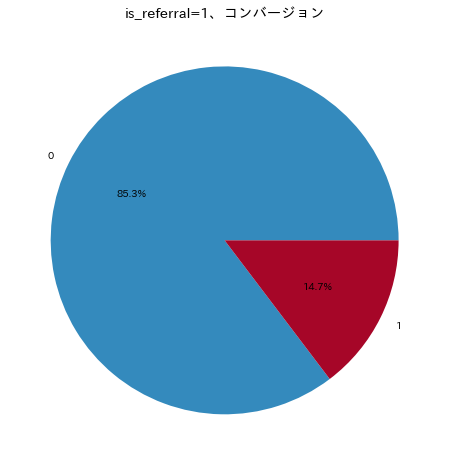

In [ ]:
_df_re1 = _df['conversion'].value_counts(normalize=True)
plt.title('is_referral=1、コンバージョン') # タイトルの表示  
plt.pie(_df_re1, labels=_df_re1.index, autopct='%.1f%%');

In [ ]:
df_re0 = df.query('is_referral==0')
df_re0.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
5,6,134.83,0,1,Surburban,0,Phone,Buy One Get One,1
7,9,46.42,0,1,Urban,0,Phone,Buy One Get One,0
13,2,101.64,0,1,Urban,0,Web,Discount,1


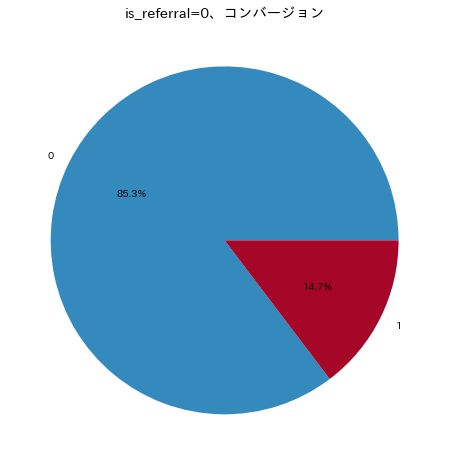

In [ ]:
_df_re0 = _df['conversion'].value_counts(normalize=True)
plt.title('is_referral=0、コンバージョン') # タイトルの表示  
plt.pie(_df_re0, labels=_df_re0.index, autopct='%.1f%%');

In [ ]:
_df_hi1 = df.query('history>=350')
_df_hi1.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
3,9,675.83,1,0,Rural,1,Web,Discount,0
8,9,675.07,1,1,Rural,1,Phone,Discount,0
10,7,548.91,0,1,Urban,1,Phone,Buy One Get One,1
12,5,642.90,0,1,Surburban,1,Multichannel,Buy One Get One,0
19,5,828.42,1,0,Surburban,1,Multichannel,Discount,0


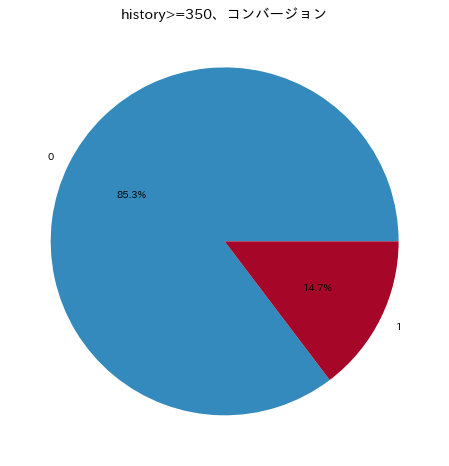

In [ ]:
_df_hi1 = _df['conversion'].value_counts(normalize=True)
plt.title('history>=350、コンバージョン') # タイトルの表示  
plt.pie(_df_hi1, labels=_df_hi1.index, autopct='%.1f%%');

In [ ]:
df_hi2 = df.query('history<350')
df_hi2.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
5,6,134.83,0,1,Surburban,0,Phone,Buy One Get One,1


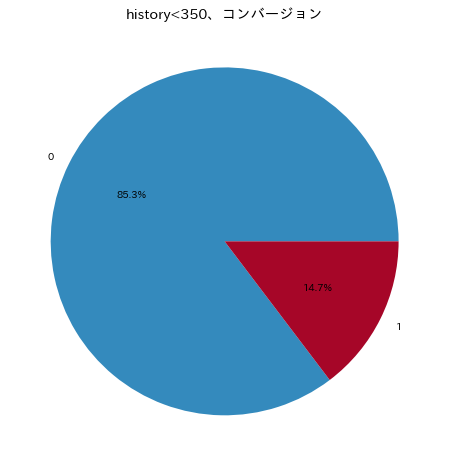

In [ ]:
_df_hi2 = _df['conversion'].value_counts(normalize=True)
plt.title('history<350、コンバージョン') # タイトルの表示  
plt.pie(_df_hi2, labels=_df_hi2.index, autopct='%.1f%%');

In [ ]:
df_rec1 = df.query('recency>=5.76')
df_rec1.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
5,6,134.83,0,1,Surburban,0,Phone,Buy One Get One,1


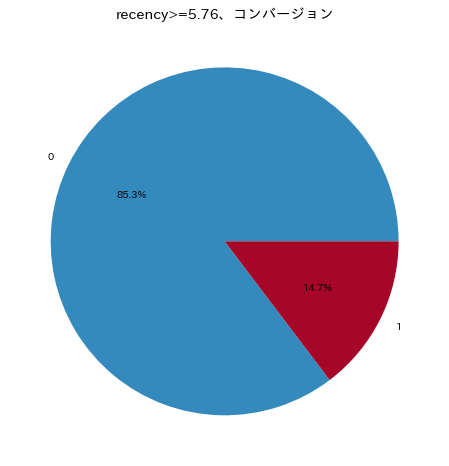

In [ ]:
_df_rec1 = _df['conversion'].value_counts(normalize=True)
plt.title('recency>=5.76、コンバージョン') # タイトルの表示  
plt.pie(_df_rec1, labels=_df_rec1.index, autopct='%.1f%%');

In [ ]:
df_rec2 = df.query('recency<=5.76')
df_rec2.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
11,1,211.45,0,1,Urban,1,Phone,Buy One Get One,0
12,5,642.90,0,1,Surburban,1,Multichannel,Buy One Get One,0
13,2,101.64,0,1,Urban,0,Web,Discount,1
14,4,241.42,0,1,Rural,1,Multichannel,No Offer,0


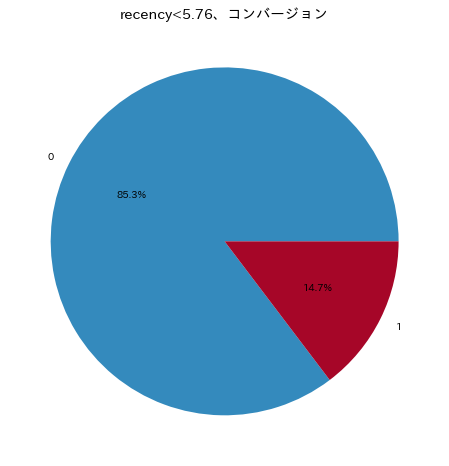

In [ ]:
_df_rec2 = _df['conversion'].value_counts(normalize=True)
plt.title('recency<5.76、コンバージョン') # タイトルの表示  
plt.pie(_df_rec2, labels=_df_rec2.index, autopct='%.1f%%');

In [ ]:
groups_bg = df.groupby('used_bogo')
groups_dc = df.groupby('used_discount')
groups_bg0 = groups_bg.get_group(0).reset_index(drop=True) 
groups_bg1 = groups_bg.get_group(1).reset_index(drop=True)
groups_dc0 = groups_dc.get_group(0).reset_index(drop=True) 
groups_dc1 = groups_dc.get_group(1).reset_index(drop=True)
groups_bg1_dc = groups_bg1.groupby('used_discount')
groups_bg1_dc0 = groups_bg1_dc.get_group(0).reset_index(drop=True) # bogo:1, discount:0
groups_bg1_dc1 = groups_bg1_dc.get_group(1).reset_index(drop=True) # bogo:1, discount:1
groups_dc1_bg = groups_dc1.groupby('used_bogo')
groups_dc1_bg0 = groups_dc1_bg.get_group(0).reset_index(drop=True) # discount:1, bogo:0 
groups_dc1_bg1 = groups_dc1_bg.get_group(1).reset_index(drop=True) # discount:0, bogo:1

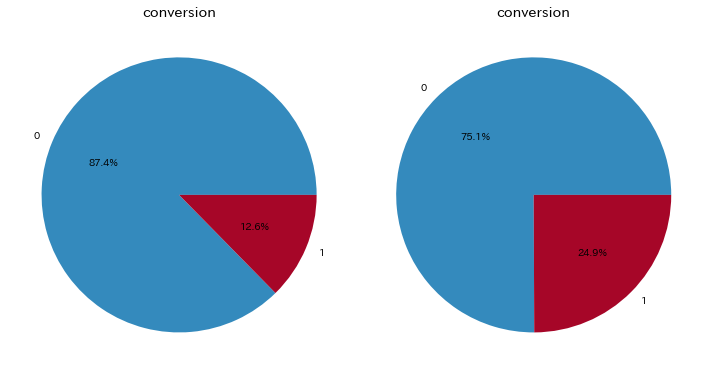

In [ ]:
# discountを使っている人（左：discountのみ、右：bogoも併用）
group_set = groups_dc1_bg
count = 2
for i in range(count):
    plt.subplot(1,count,i+1)
    plt.title('conversion')
    gr = group_set.get_group(i).reset_index(drop=True)
    index = gr['conversion'].value_counts(normalize=True)
    plt.pie(index, labels=index.index, autopct = '%.1f%%')
    plt.tight_layout()
plt.show()

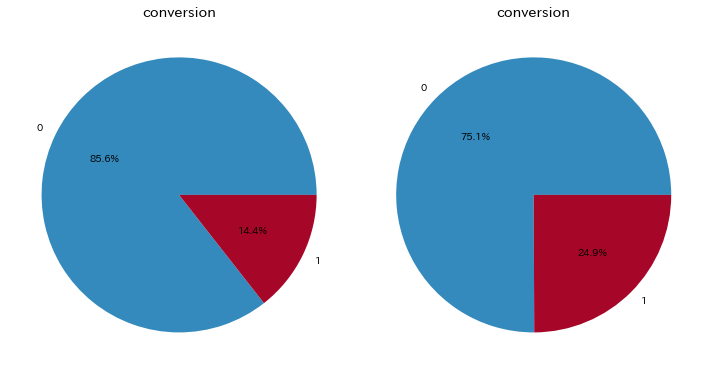

In [ ]:
# bogoを使っている人（左：bogoのみ、右：discountも併用）
group_set = groups_bg1_dc
count = 2
for i in range(count):
    plt.subplot(1,count,i+1)
    plt.title('conversion')
    gr = group_set.get_group(i).reset_index(drop=True)
    index = gr['conversion'].value_counts(normalize=True)
    plt.pie(index, labels=index.index, autopct = '%.1f%%')
    plt.tight_layout()
plt.show()

In [ ]:
df_mc = df.query('channel in ["Multichannel"]')

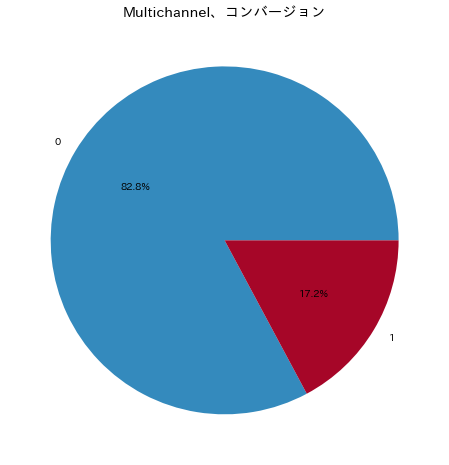

In [ ]:
_df_mc = df_mc['conversion'].value_counts(normalize=True)
plt.title('Multichannel、コンバージョン') # タイトルの表示  
plt.pie(_df_mc, labels=_df_mc.index, autopct='%.1f%%');

In [ ]:
df_ph = df.query('channel in ["Phone"]')

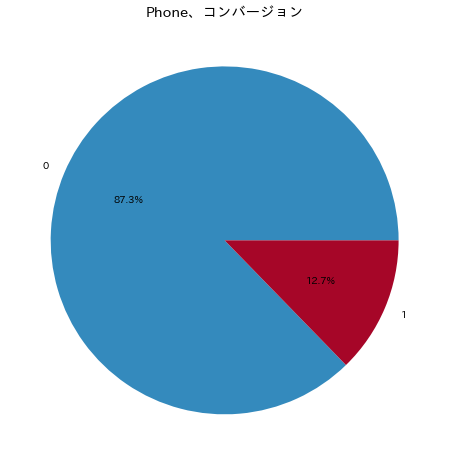

In [ ]:
_df_ph = df_ph['conversion'].value_counts(normalize=True)
plt.title('Phone、コンバージョン') # タイトルの表示  
plt.pie(_df_ph, labels=_df_ph.index, autopct='%.1f%%');

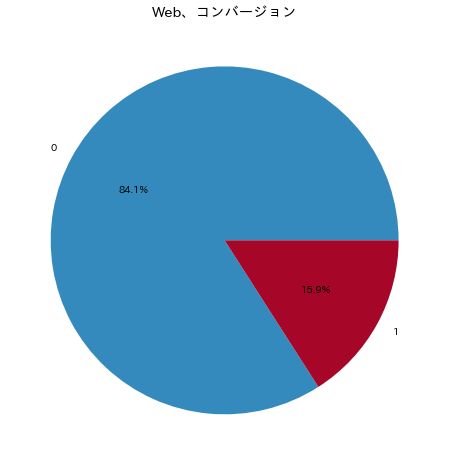

In [ ]:
df_web = df.query('channel in ["Web"] ')
_df_web = df_web['conversion'].value_counts(normalize=True)
plt.title('Web、コンバージョン') # タイトルの表示  
plt.pie(_df_web, labels=_df_web.index, autopct='%.1f%%');

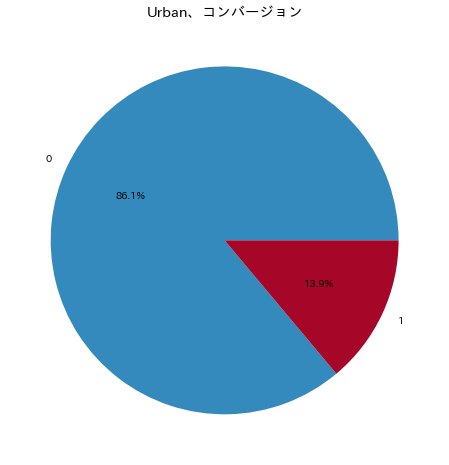

In [ ]:
df_ub = df.query('zip_code in ["Urban"]')
_df_ub = df_ub['conversion'].value_counts(normalize=True)
plt.title('Urban、コンバージョン') # タイトルの表示  
plt.pie(_df_ub, labels=_df_ub.index, autopct='%.1f%%');

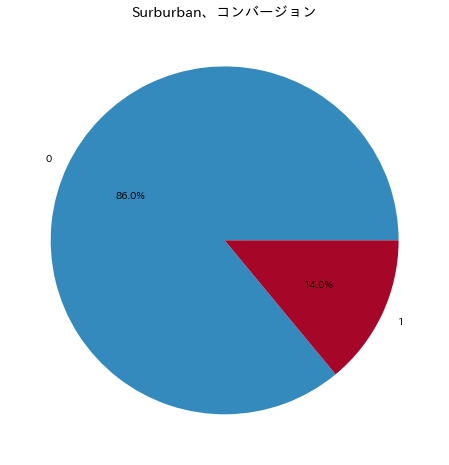

In [ ]:
df_sb = df.query('zip_code in ["Surburban"]')
_df_sb = df_sb['conversion'].value_counts(normalize=True)
plt.title('Surburban、コンバージョン') # タイトルの表示  
plt.pie(_df_sb, labels=_df_sb.index, autopct='%.1f%%');

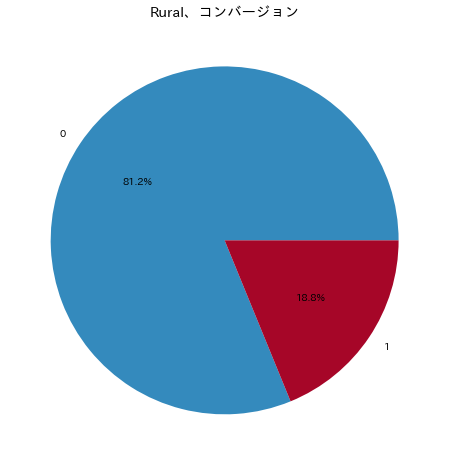

In [ ]:
df_rr = df.query('zip_code in ["Rural"]')
_df_rr = df_rr['conversion'].value_counts(normalize=True)
plt.title('Rural、コンバージョン') # タイトルの表示  
plt.pie(_df_rr, labels=_df_rr.index, autopct='%.1f%%');

<メモ>

* referral：0である方がconversionが高い。

* offer：DiscountとBuy One Get Oneの利用経験が両方ある場合は購入につながる割合が約25％と相対的に高い。どちらか一方だけだと平均13％ほどにとどまる。

* channel：Maltichannel, Web, Phoneの順で割合が高い。

* zip_code：Rural, Surburban, Urbanの順で割合高い。ただしSurburbanとUrbanではほとんど差がない。

### クラスタリング

In [ ]:
_df = df.select_dtypes(include='number')
y = _df['conversion']
x = _df.drop(['conversion', 'is_referral'], axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
feature = pd.DataFrame(x_scaled, columns=_df.drop(['conversion', 'is_referral'], axis=1).columns)
feature

,recency,history,used_discount,used_bogo
0,1.207751,-0.389003,0.902651,-1.104914
1,0.067359,0.339614,0.902651,0.905048
2,0.352457,-0.239836,-1.107848,0.905048
3,0.922653,1.693278,0.902651,-1.104914
4,-1.073034,-0.768068,0.902651,-1.104914
...,...,...,...,...
63995,1.207751,-0.533055,0.902651,-1.104914
63996,-0.217739,-0.793170,-1.107848,0.905048
63997,0.067359,-0.827992,0.902651,-1.104914
63998,-1.358132,1.213532,0.902651,-1.104914


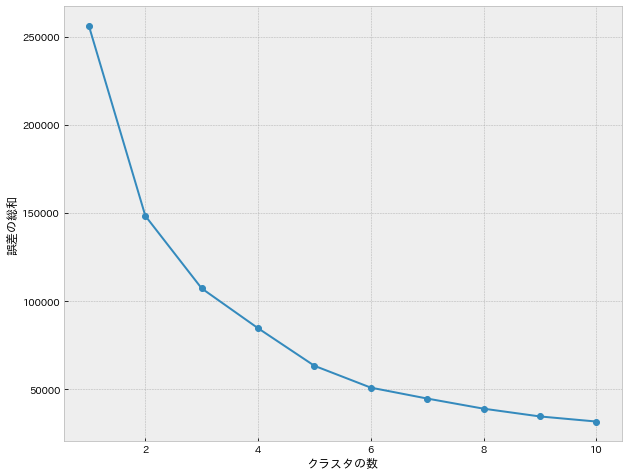

In [ ]:
#エルボー法による最適なクラスタ数の計算  
from sklearn.cluster import KMeans

sse = []

for i in range(1,11):                
    kmeans = KMeans(
        n_clusters=i,
        n_init=10,
        random_state=0
        )
    
    kmeans.fit(x_scaled)             
    sse.append(kmeans.inertia_)   

plt.plot(range(1,11), sse , marker='o')
plt.xlabel('クラスタの数')
plt.ylabel('誤差の総和')
plt.show()

In [ ]:
# クラスタリングの実行  
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(x_scaled)
cluster = kmeans.labels_

In [ ]:
df_clustering = df.copy()

In [ ]:
df_clustering['cluster'] = cluster

In [ ]:
# 変数 `cluster` 毎に groupby() でまとめる  
groups = df_clustering.groupby('cluster')

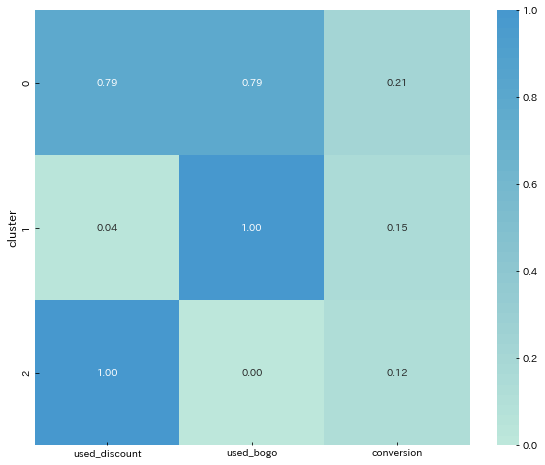

In [ ]:
# クラスタ毎の各項目の代表値を見る（平均値）: 
mean = groups.mean().drop(['history', 'recency','is_referral'], axis=1)

sns.heatmap(
    mean,
    annot=True,
    square=True,
    vmin=0.0,
    vmax=1.0,
    center=3.0,
    fmt='.2f'
    );

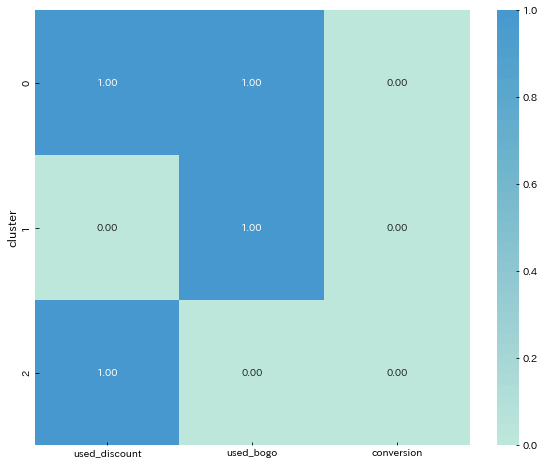

In [ ]:
# クラスタ毎の各項目の代表値を見る（平均値)
median = groups.median().drop(['history', 'recency','is_referral'], axis=1)

sns.heatmap(
    median,
    annot=True,
    square=True,
    vmin=0.0,
    vmax=1.0,
    center=3.0,
    fmt='.2f'
    );

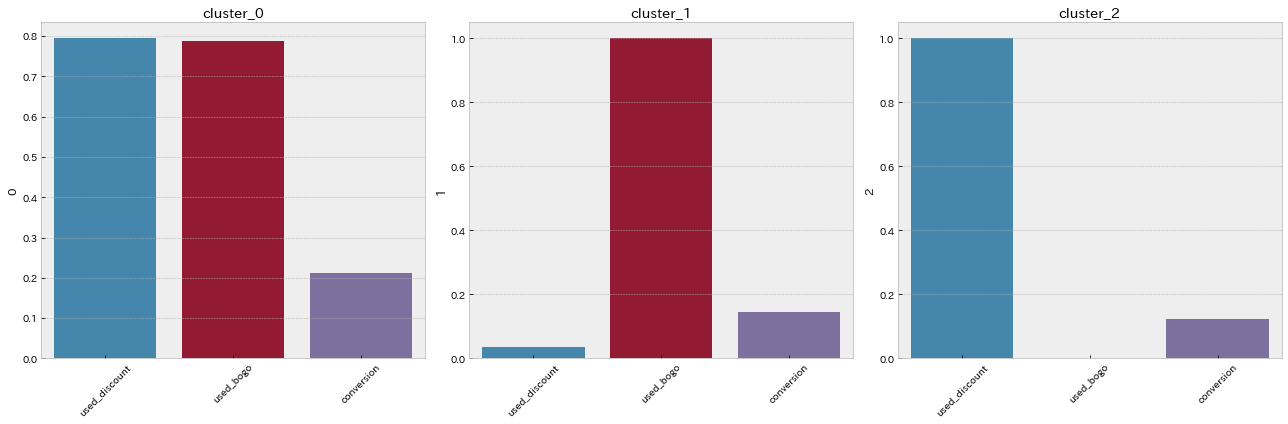

In [ ]:
num = kmeans.n_clusters

plt.figure(figsize=(18, 6))

for n in range(num):
    plt.subplot(1, 3, n+1)
    plt.title(f'cluster_{n}')
    sns.barplot(x=mean.columns, y=mean.loc[n])
    plt.xticks(rotation=45)
    plt.tight_layout()

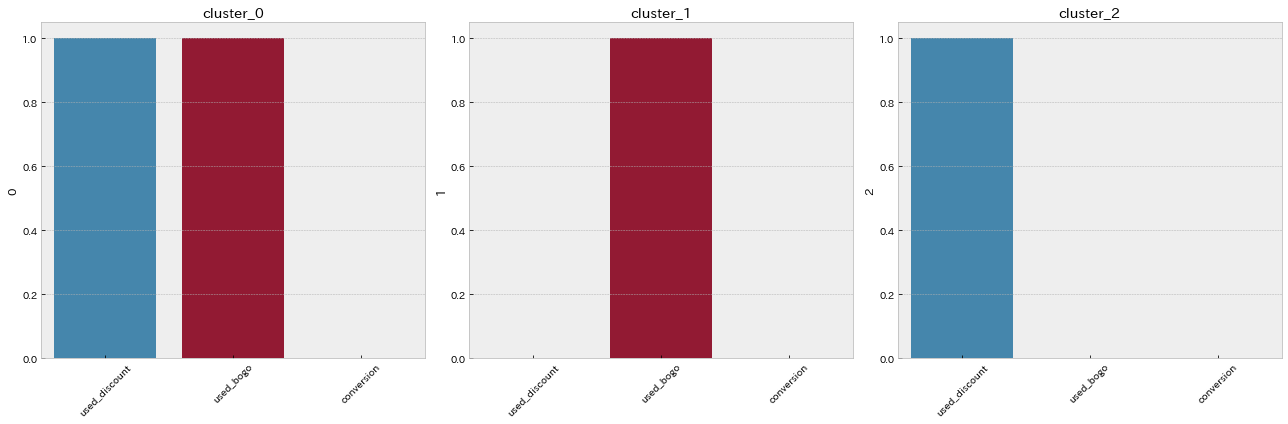

In [ ]:
num = kmeans.n_clusters

plt.figure(figsize=(18, 6))

for n in range(num):
    plt.subplot(1, 3, n+1)
    plt.title(f'cluster_{n}')
    sns.barplot(x=median.columns, y=median.loc[n])
    plt.xticks(rotation=45)
    plt.tight_layout()

<メモ>

* クラスター0はconversionが最も高い

* ここまでの分析を踏まえ、潜在顧客となり得るのはクラスター1、クラスター4である

* 以上から結論として
クラスター1:used_discountクーポンを配布<br>
クラスター2:used_bogoクーポンを配布<br>
という施策が考えられる

# 結論

以上の分析より、
* クラスター1の顧客に対して、offer_Discountクーポンを配布
* クラスター4の顧客に対して、offer_Buy One Get Oneクーポンを配布
* 顧客を絞るのであれば、recencyが最近かつ、zip_codeがRuralである顧客からプロモーションを行う

という施策を提案する。

## 効果の検討
* 現状：conversion=1となっているのは、9394人/64000であり全体の約14.7%である
* 施策の効果：既に全員がused_bogoもしくはused_discountにおいて1となっているため、この施策によって全体の約24.9%がconversion=1になると予想される
* 以上から、全体のconversion=1となる人数の割合は約24.9%（現状の約1.7倍）になると推測可能

In [ ]:
df[((df['conversion'] == 0) & (df['used_bogo'] == 0)  & (df['used_discount'] == 1))]

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
6,9,280.20,1,0,Surburban,1,Phone,Buy One Get One,0
16,5,29.99,1,0,Surburban,0,Phone,Discount,0
...,...,...,...,...,...,...,...,...,...
63988,6,32.98,1,0,Surburban,0,Web,Discount,0
63991,1,306.10,1,0,Surburban,1,Phone,Buy One Get One,0
63995,10,105.54,1,0,Urban,0,Web,Discount,0
63997,6,29.99,1,0,Urban,1,Phone,Discount,0


In [ ]:
df[((df['conversion'] == 0) & (df['used_bogo'] == 1)  & (df['used_discount'] == 0))]

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
7,9,46.42,0,1,Urban,0,Phone,Buy One Get One,0
9,10,32.84,0,1,Urban,1,Web,Buy One Get One,0
11,1,211.45,0,1,Urban,1,Phone,Buy One Get One,0
12,5,642.90,0,1,Surburban,1,Multichannel,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...
63990,6,80.02,0,1,Surburban,0,Phone,No Offer,0
63993,4,374.07,0,1,Surburban,0,Phone,Buy One Get One,0
63994,7,86.46,0,1,Urban,0,Web,Discount,0
63996,5,38.91,0,1,Urban,1,Phone,Discount,0


# [付録]主成分分析による可視化


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
_df = df.select_dtypes(include='number')
x = _df.drop('conversion', axis=1)
y = _df['conversion']

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)
x_scaled.shape

(64000, 5)

In [ ]:
pca = PCA(n_components=3, random_state=0)
feature = pd.DataFrame(pca.fit_transform(x_scaled), columns=['PC1', 'PC2', 'PC3'])
df_PC = df.join(feature)
df_PC

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion,PC1,PC2,PC3
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0,-1.415445,-1.412868,0.066203
1,6,329.08,1,1,Rural,1,Web,No Offer,0,0.002456,0.838762,0.769286
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0,1.424848,0.119458,0.978653
3,9,675.83,1,0,Rural,1,Web,Discount,0,-1.414561,1.138384,1.334619
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0,-1.424517,-0.468927,-1.445714
...,...,...,...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,Discount,0,-1.415539,-1.511521,0.068551
63996,5,38.91,0,1,Urban,1,Phone,Discount,0,1.422281,0.041399,0.608150
63997,6,29.99,1,0,Urban,1,Phone,Discount,0,-1.419511,-0.136955,0.806439
63998,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One,0,-1.423699,2.013374,-0.175656


In [ ]:
variance_ratio = pca.explained_variance_ratio_

pd.DataFrame(
    variance_ratio,
    index=[f'PC{x+1}' for x in range(len(variance_ratio))],
    columns=['寄与率']
)

,寄与率
PC1,0.363391
PC2,0.275531
PC3,0.189647


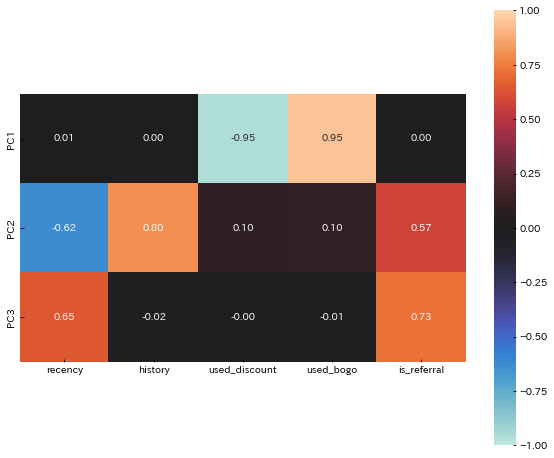

In [ ]:
cols = _df.columns.drop(['conversion'])

factor_loading = pca.components_ * np.c_[np.sqrt(pca.explained_variance_)]

df_factor_loading = pd.DataFrame(
    factor_loading,
    index=[f'PC{x+1}' for x in range(len(factor_loading))],
    columns=cols
)

sns.heatmap(df_factor_loading.head(3), vmax=1.0, center=0.0, vmin=-1.0, square=True, annot=True, fmt='.2f');

In [ ]:
x = df_PC[['PC1','PC2', 'PC3']]
y = df_PC['conversion']

In [ ]:
# 重回帰分析を実行  
np.random.seed(0)
multi_logit = sm.Logit(y, sm.add_constant(x))
result = multi_logit.fit()

Optimization terminated successfully.
         Current function value: 0.409655
         Iterations 6


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             conversion   No. Observations:                64000
Model:                          Logit   Df Residuals:                    63996
Method:                           MLE   Df Model:                            3
Date:                Tue, 24 May 2022   Pseudo R-squ.:                 0.01781
Time:                        14:15:56   Log-Likelihood:                -26218.
converged:                       True   LL-Null:                       -26693.
Covariance Type:            nonrobust   LLR p-value:                7.760e-206
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8034      0.012   -155.426      0.000      -1.826      -1.781
PC1            0.0506      0.008      6.015      0.000       0.034       0.067
PC2            0.1110      0.009     12.034      0.000       0.093       0.129
PC3           -0.3297      0.012    -27.675      0.000      -0.353      -0.306
==============================================================================
"""

<メモ>

* 主成分分析の結果、PC3が大きな負の影響を与えている

* PC3に影響を与えているrecency、referralの変数に関しては、先ほど行った重回帰分析の結果から判断できる